In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("선택컬럼_건강데이터.csv")

In [4]:
data.head()

,ID,year,region,town_t,sex,age,incm,ho_incm,edu,occp,...,HE_crea,HE_Upro,HE_Ucrea,HE_Ualb,L_BR_FQ,L_LN_FQ,L_DN_FQ,L_OUT_FQ,LS_VEG1,LS_FRUIT
0,YA84208301,2023.0,1.0,1.0,1.0,75.0,3.0,2.0,1.0,7.0,...,0.78,0.0,96.8,4.5,1.0,1.0,1.0,3.0,1.0,3.0
1,YA84208302,2023.0,1.0,1.0,2.0,70.0,3.0,2.0,1.0,7.0,...,0.63,1.0,141.1,88.2,2.0,2.0,2.0,5.0,2.0,3.0
2,YA84212402,2023.0,1.0,1.0,2.0,42.0,2.0,3.0,3.0,3.0,...,0.81,0.0,114.3,4.3,4.0,2.0,1.0,5.0,3.0,7.0
3,YA84212404,2023.0,1.0,1.0,2.0,9.0,2.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,2.0,5.0
4,YA84242702,2023.0,1.0,1.0,1.0,43.0,4.0,4.0,4.0,1.0,...,1.19,0.0,210.1,6.6,2.0,2.0,1.0,4.0,2.0,3.0


In [5]:
data.isnull().sum()

ID            0
year          0
region        0
town_t        0
sex           0
           ... 
L_LN_FQ     132
L_DN_FQ     132
L_OUT_FQ    132
LS_VEG1     132
LS_FRUIT    132
Length: 98, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6929 entries, 0 to 6928
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6929 non-null   object 
 1   year         6929 non-null   float64
 2   region       6929 non-null   float64
 3   town_t       6929 non-null   float64
 4   sex          6929 non-null   float64
 5   age          6929 non-null   float64
 6   incm         6903 non-null   float64
 7   ho_incm      6903 non-null   float64
 8   edu          6776 non-null   float64
 9   occp         5596 non-null   float64
 10  cfam         6929 non-null   float64
 11  genertn      6929 non-null   float64
 12  D_1_1        6928 non-null   float64
 13  DI1_dg       6928 non-null   float64
 14  DI1_ag       6928 non-null   float64
 15  DI1_pr       6928 non-null   float64
 16  DI1_pt       6928 non-null   float64
 17  DI1_2        6928 non-null   float64
 18  DI2_dg       6928 non-null   float64
 19  DI2_ag

1. 아침식사 빈도별 군집화

In [8]:
# 'L_BR_FQ' 열의 값별 개수 세기
breakfast_group_counts = data['L_BR_FQ'].value_counts().sort_index()

# 결과 출력
print("L_BR_FQ 열의 그룹별 개수:")
print(breakfast_group_counts)

L_BR_FQ 열의 그룹별 개수:
L_BR_FQ
1.0    4193
2.0     713
3.0     797
4.0    1094
Name: count, dtype: int64


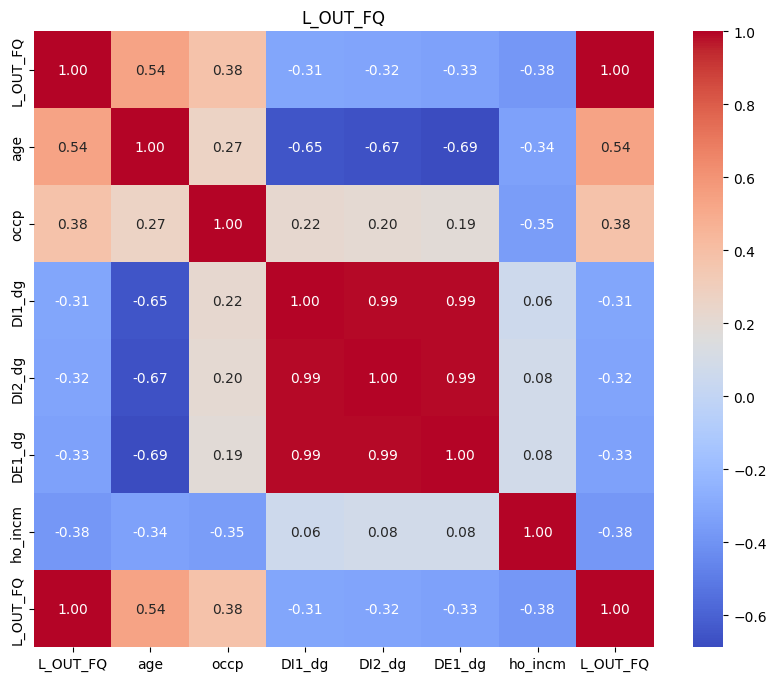

In [14]:
# 'ID'와 'year' 열 제외
df = data.drop(columns=['ID', 'year'])

# 'BE5_1' 열과 나머지 열과의 상관관계 계산
correlation = df.corr()['L_OUT_FQ']

# 상관관계의 절댓값이 0.5 이상인 컬럼 추출
significant_corr = correlation[abs(correlation) >= 0.3].sort_values(ascending=False)

if not significant_corr.empty:
    # 해당 컬럼들만 포함하는 새로운 데이터프레임 생성 (L_BR_FQ 포함)
    cols_to_plot = significant_corr.index.tolist() + ['L_OUT_FQ']
    heatmap_data = df[cols_to_plot].corr()

    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('L_OUT_FQ')
else:
    print("'L_OUT_FQ' 열과 절댓값 0.3 이상인 상관관계를 갖는 컬럼이 없습니다.")

age(나이), occp(직업재분류 및 실업/비경제활동 상태 코드), DI2_dg(혈압조절제 복용), DE1_dg(당뇨병 의사진단 여부), ho_incm(소득 4분위수(가구))
* DI1_dg이랑 DI2_dg 상관관계 0.99이므로 DI2_dg만 선택


L_OUT_FQ 1 (하루 2회 이상):


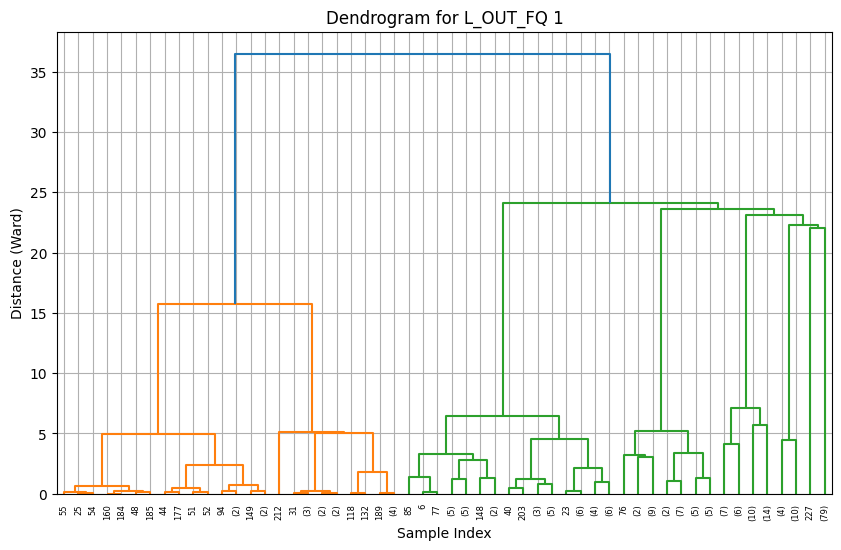

L_OUT_FQ 1 (하루 2회 이상): 자동 선택된 최적 k = 5


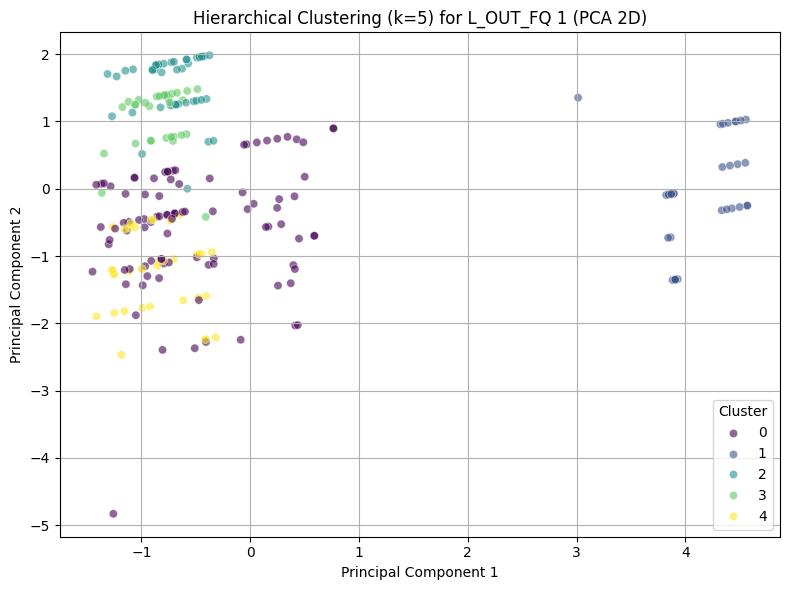


L_OUT_FQ 1 (하루 2회 이상) 군집 중심값:
군집 이름:
  군집 0: 중년 중소득 건강 주의 기타직업
  군집 1: 젊은 중소득 건강 고위험 기타직업
  군집 2: 중년 고소득 건강 주의 전문직
  군집 3: 중년 고소득 건강 주의 사무직
  군집 4: 중년 중소득 건강 주의 서비스직

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  48.010638  0.265957  0.106383  2.957447  5.551115e-17 -1.387779e-16   
1  11.242424  8.000000  8.000000  3.121212  3.030303e-02 -1.110223e-16   
2  40.116279  0.162791  0.093023  3.511628  1.000000e+00 -1.110223e-16   
3  44.129032  0.290323  0.129032  3.516129  0.000000e+00  1.000000e+00   
4  44.000000  0.162162  0.108108  2.837838  8.326673e-17 -1.110223e-16   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0      occp_7.0  \
0  0.000000e+00  1.063830e-02  4.148936e-01  1.489362e-01  2.446809e-01   
1 -1.110223e-16 -2.602085e-18  0.000000e+00  6.938894e-18  4.545455e-01   
2 -1.665335e-16  1.734723e-18  0.000000e+00  0.000000e+00  2.775558e-17   
3 -1.110223e-16 -2.602085e-18  0.000000e+00  0.000000e+00 -5.551115e-17   
4  1

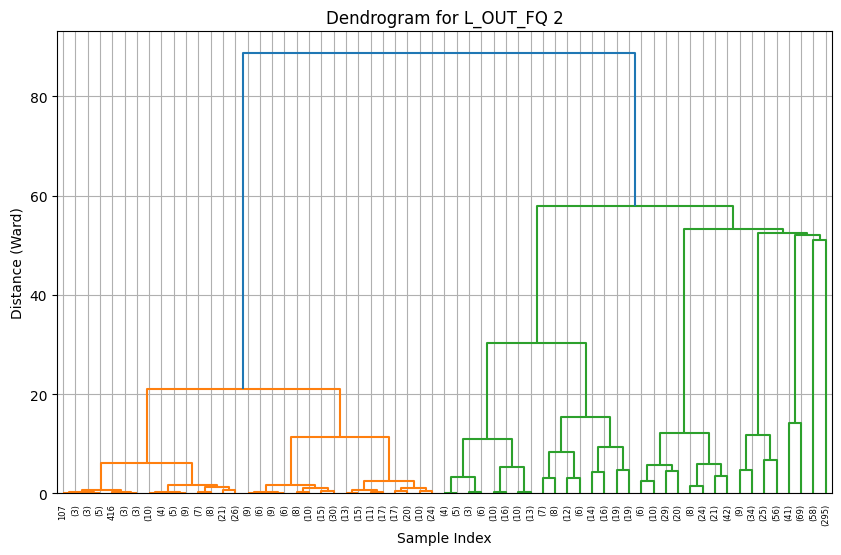

L_OUT_FQ 2 (하루 1회): 자동 선택된 최적 k = 5


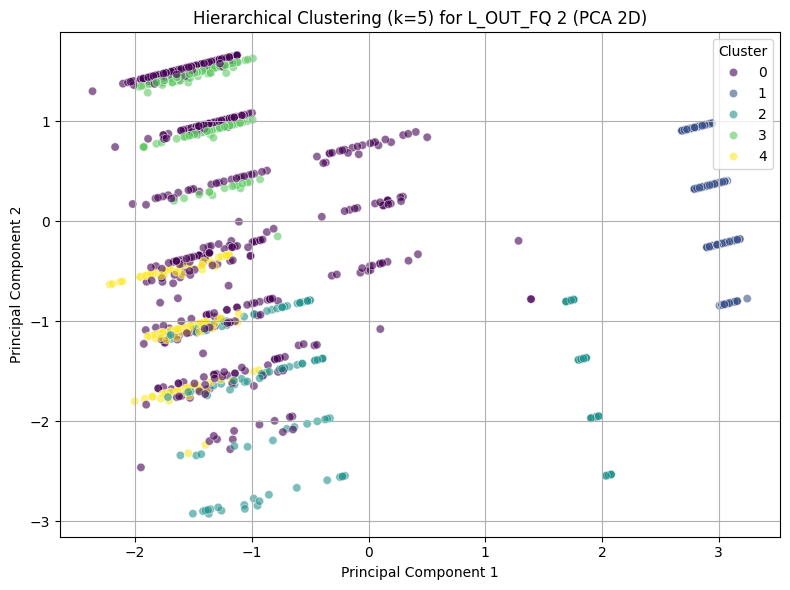


L_OUT_FQ 2 (하루 1회) 군집 중심값:
군집 이름:
  군집 0: 중년 중소득 건강 주의 전문직
  군집 1: 젊은 중소득 건강 고위험 기타직업
  군집 2: 젊은 중소득 건강 고위험 기타직업
  군집 3: 중년 중소득 건강 주의 사무직
  군집 4: 고령 중소득 건강 주의 기타직업

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  44.269978  0.226782  0.118790  3.170626  4.946004e-01 -1.942890e-16   
1   8.620061  8.000000  8.000000  2.893617  1.276756e-15 -1.665335e-16   
2  34.803571  3.309524  3.244048  2.857143  2.498002e-16 -1.665335e-16   
3  42.512500  0.112500  0.037500  3.487500  1.387779e-16  1.000000e+00   
4  51.758065  0.250000  0.153226  3.072581 -2.498002e-16 -1.665335e-16   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0      occp_7.0  \
0  2.375810e-01  1.079914e-02 -5.828671e-16  1.252700e-01 -4.440892e-16   
1  4.857226e-16  1.040834e-17 -4.996004e-16 -1.179612e-16 -4.163336e-16   
2 -2.220446e-16  6.938894e-18 -2.636780e-16  6.938894e-18  1.000000e+00   
3 -2.081668e-16  6.071532e-18 -2.498002e-16  3.469447e-17 -3.608225e-16   
4 -1.8

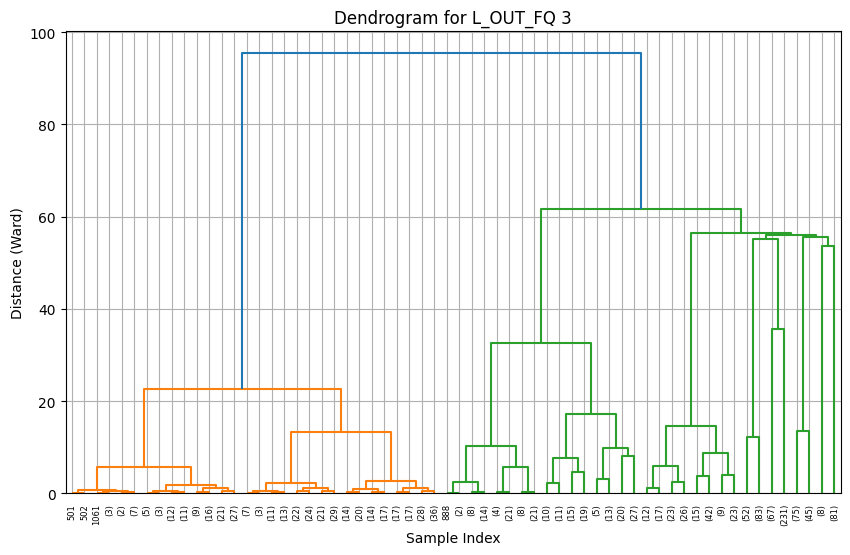

L_OUT_FQ 3 (주 5~6회): 자동 선택된 최적 k = 5


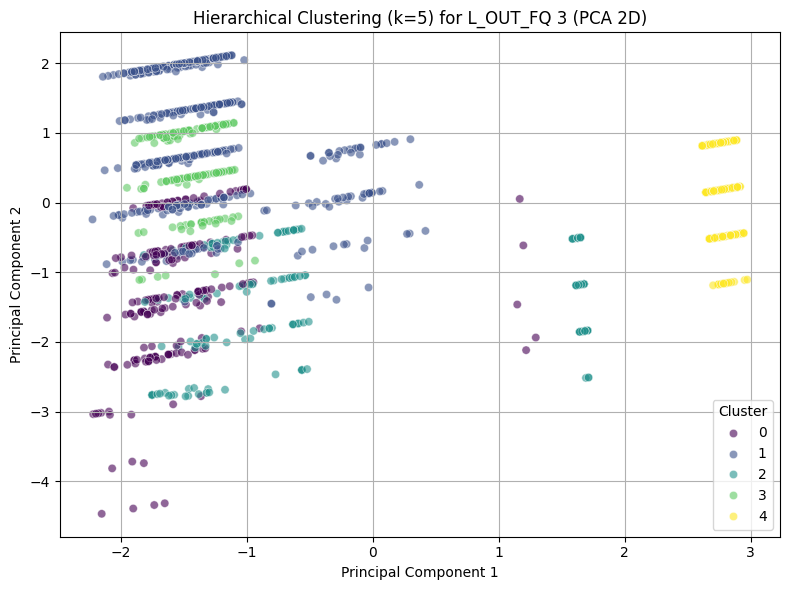


L_OUT_FQ 3 (주 5~6회) 군집 중심값:
군집 이름:
  군집 0: 고령 중소득 건강 고위험 서비스직
  군집 1: 중년 중소득 건강 주의 전문직
  군집 2: 중년 중소득 건강 고위험 기타직업
  군집 3: 중년 중소득 건강 주의 사무직
  군집 4: 젊은 중소득 건강 고위험 기타직업

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  50.980861  0.401914  0.244019  2.717703 -2.775558e-17 -4.302114e-16   
1  45.794457  0.189376  0.073903  3.279446  5.334873e-01  4.024558e-16   
2  36.120603  3.321608  3.266332  2.778894 -2.775558e-17 -4.024558e-16   
3  43.107784  0.173653  0.059880  3.233533 -2.775558e-17  1.000000e+00   
4   8.327670  8.000000  8.000000  2.990291 -2.775558e-17  2.081668e-16   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0      occp_7.0  \
0  5.741627e-01  3.827751e-02 -5.134781e-16  3.875598e-01 -3.330669e-16   
1 -1.110223e-16 -1.387779e-17  3.117783e-01  3.053113e-16  9.159340e-16   
2 -1.110223e-16 -1.127570e-17 -4.996004e-16  2.289835e-16  1.000000e+00   
3 -1.110223e-16 -1.127570e-17 -4.024558e-16  2.012279e-16 -3.053113e-16   
4 -1

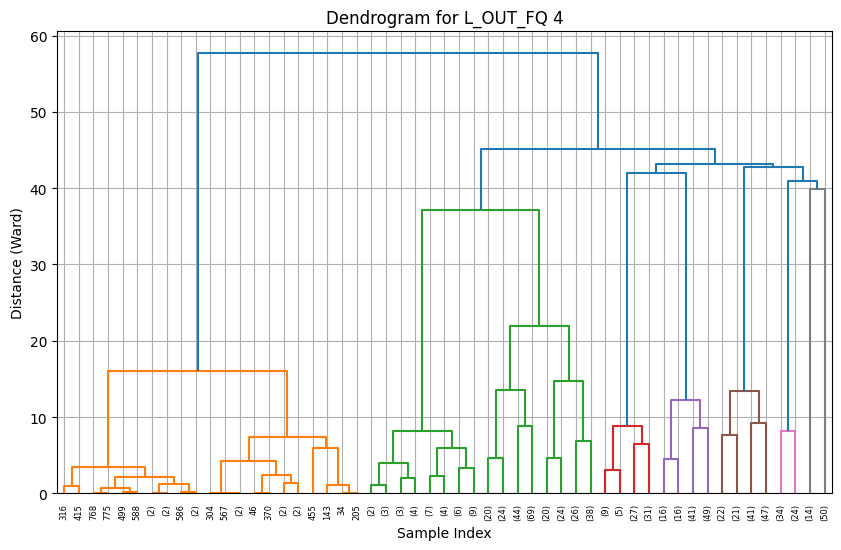

L_OUT_FQ 4 (주 3~4회): 자동 선택된 최적 k = 5


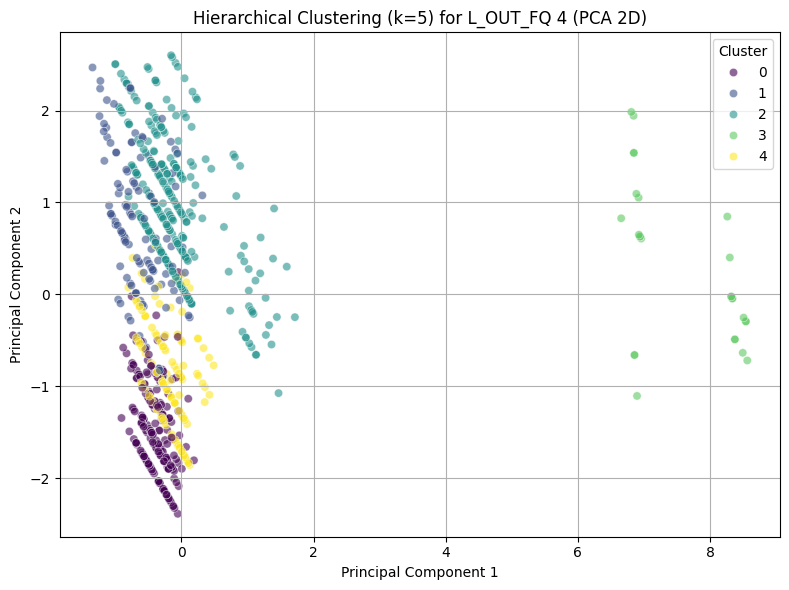


L_OUT_FQ 4 (주 3~4회) 군집 중심값:
군집 이름:
  군집 0: 중년 중소득 건강 주의 전문직
  군집 1: 고령 중소득 건강 주의 기타직업
  군집 2: 중년 중소득 건강 주의 기타직업
  군집 3: 젊은 중소득 건강 고위험 기타직업
  군집 4: 중년 중소득 건강 주의 서비스직

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  42.195876  0.159794  0.041237  3.226804  6.288660e-01  3.711340e-01   
1  56.360656  0.229508  0.180328  2.590164  3.885781e-16  0.000000e+00   
2  48.359736  0.214521  0.102310  2.735974 -6.938894e-16  2.914335e-16   
3  13.444444  8.000000  8.000000  3.000000 -5.551115e-17  4.163336e-17   
4  43.312977  0.183206  0.114504  2.900763  3.885781e-16 -4.163336e-17   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0      occp_7.0  \
0  4.718448e-16 -7.632783e-17 -6.938894e-17  8.326673e-17 -2.220446e-16   
1 -2.220446e-16  1.147541e-01  4.754098e-01  4.098361e-01 -8.326673e-16   
2  1.137979e-15  1.387779e-17 -2.220446e-16 -1.249001e-16  8.745875e-01   
3  1.111111e-01  3.469447e-18  0.000000e+00  3.703704e-02  3.703704e-01   
4  1.

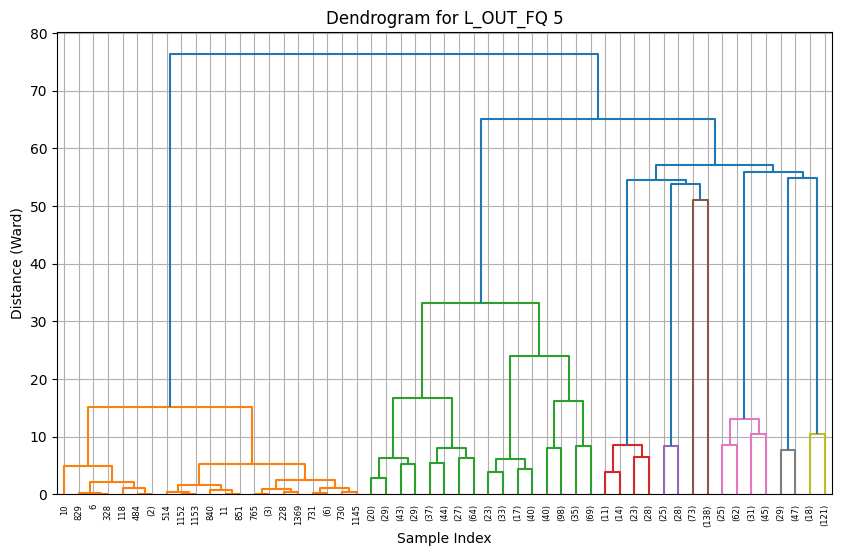

L_OUT_FQ 5 (주 1~2회): 자동 선택된 최적 k = 5


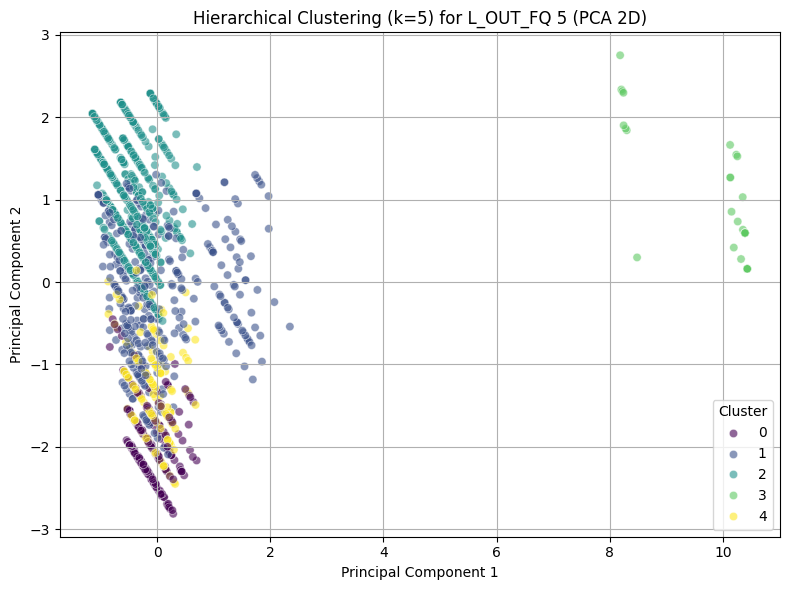


L_OUT_FQ 5 (주 1~2회) 군집 중심값:
군집 이름:
  군집 0: 중년 중소득 건강 주의 전문직
  군집 1: 고령 저소득 건강 고위험 기타직업
  군집 2: 고령 저소득 건강 고위험 기타직업
  군집 3: 젊은 중소득 건강 고위험 기타직업
  군집 4: 고령 중소득 건강 주의 서비스직

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  46.009302  0.186047  0.051163  3.218605  6.465116e-01  3.534884e-01   
1  59.308824  0.367647  0.179412  2.494118  2.081668e-16  9.020562e-17   
2  56.584877  0.339506  0.125000  2.496914  2.220446e-16 -4.718448e-16   
3   8.137931  8.000000  8.000000  2.689655  2.775558e-17 -3.469447e-17   
4  50.441718  0.276074  0.079755  2.895706  2.081668e-16  6.938894e-17   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0      occp_7.0  \
0  2.775558e-17  8.326673e-17  7.632783e-17  3.191891e-16 -1.831868e-15   
1 -6.106227e-16  1.558824e-01  2.235294e-01  4.058824e-01 -3.441691e-15   
2  9.575674e-16 -5.204170e-16 -4.718448e-16  4.024558e-16  1.000000e+00   
3  3.448276e-02  0.000000e+00 -3.469447e-17 -4.163336e-17  2.413793e-01   
4  

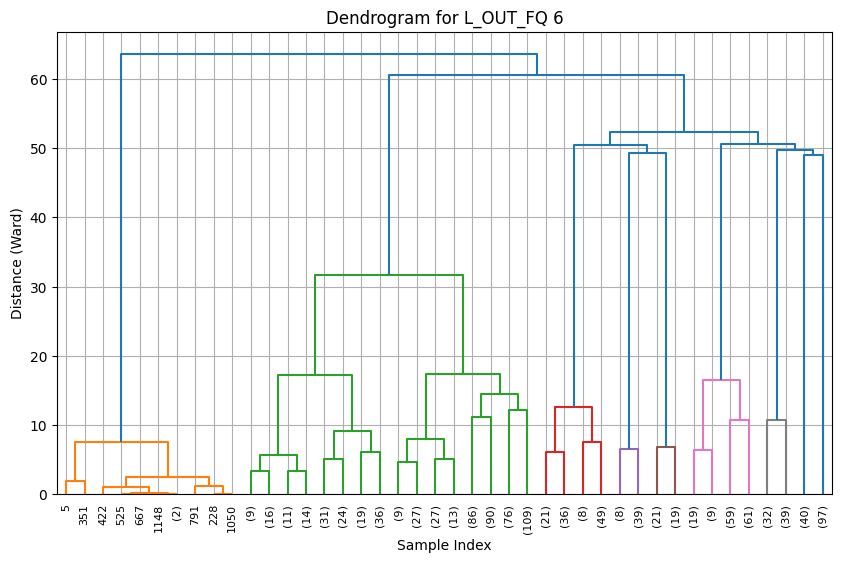

L_OUT_FQ 6 (월 1~3회): 자동 선택된 최적 k = 5


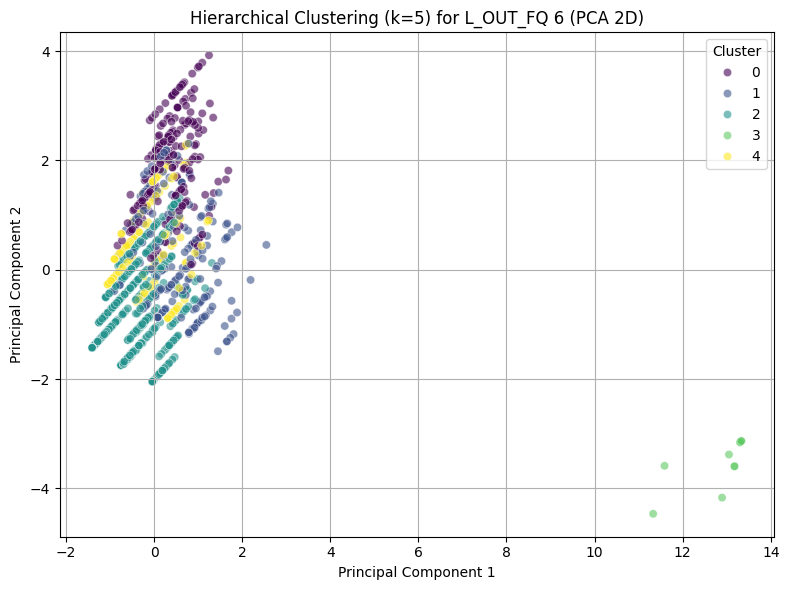


L_OUT_FQ 6 (월 1~3회) 군집 중심값:
군집 이름:
  군집 0: 고령 중소득 건강 주의 서비스직
  군집 1: 고령 저소득 건강 고위험 기타직업
  군집 2: 고령 저소득 건강 고위험 기타직업
  군집 3: 젊은 중소득 건강 고위험 기타직업
  군집 4: 고령 저소득 건강 고위험 기타직업

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  55.502488  0.273632  0.104478  2.746269  2.338308e-01  1.990050e-01   
1  66.048077  0.375000  0.216346  2.192308 -1.179612e-16  3.469447e-17   
2  64.381910  0.366834  0.159129  2.028476 -1.804112e-16  3.330669e-16   
3   5.363636  8.000000  8.000000  2.636364  6.938894e-18  0.000000e+00   
4  66.074324  0.351351  0.189189  2.027027 -7.632783e-17  9.714451e-17   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0      occp_7.0  \
0  5.671642e-01  4.857226e-17  8.326673e-17  3.053113e-16  2.442491e-15   
1  1.942890e-16  1.923077e-01  3.413462e-01  3.885781e-16  2.553513e-15   
2  4.302114e-16  3.330669e-16 -6.314393e-16  1.609823e-15  1.000000e+00   
3  1.387779e-17  6.938894e-18  2.081668e-17  2.775558e-17  1.818182e-01   
4

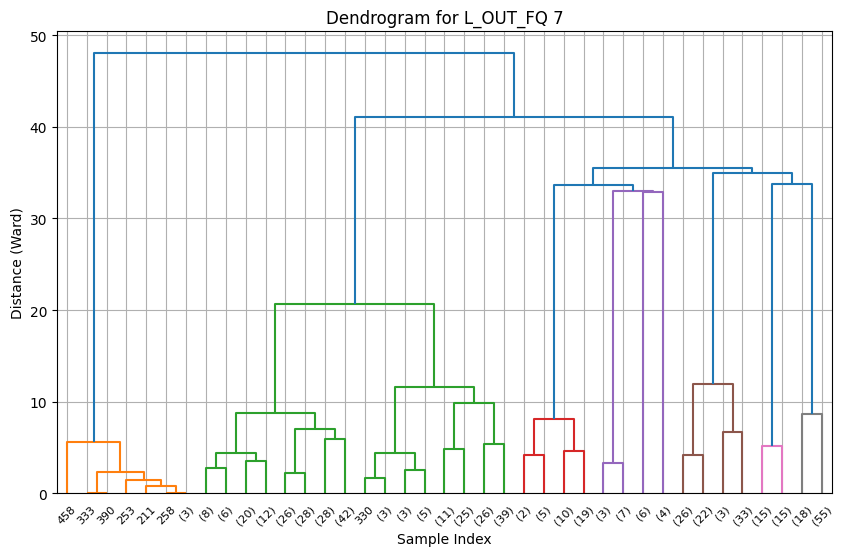

L_OUT_FQ 7 (거의 안 한다): 자동 선택된 최적 k = 5


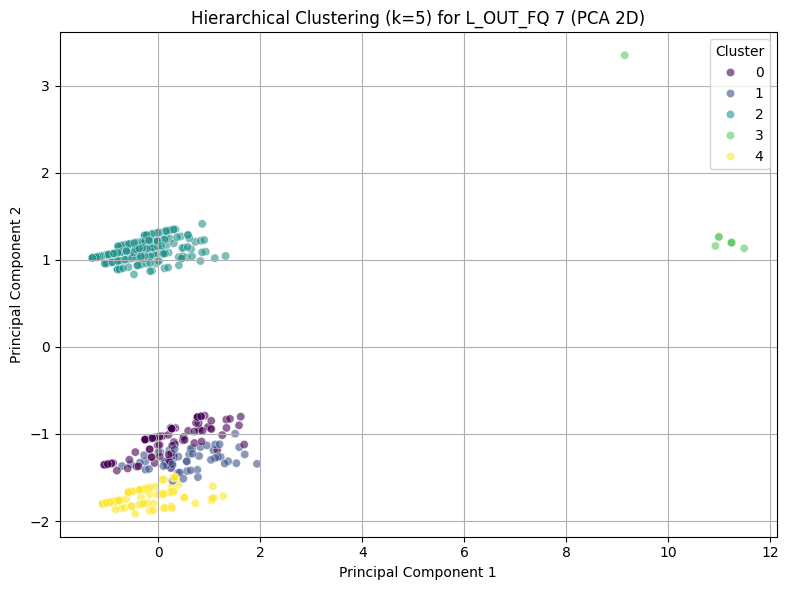


L_OUT_FQ 7 (거의 안 한다) 군집 중심값:
군집 이름:
  군집 0: 고령 저소득 건강 고위험 기타직업
  군집 1: 고령 저소득 건강 고위험 서비스직
  군집 2: 고령 저소득 건강 고위험 기타직업
  군집 3: 젊은 중소득 건강 고위험 기타직업
  군집 4: 고령 저소득 건강 고위험 기타직업

군집 중심값:
         age    DI2_dg    DE1_dg   ho_incm      occp_1.0      occp_2.0  \
0  72.446602  0.320388  0.320388  1.407767 -8.673617e-18  0.000000e+00   
1  60.696429  0.375000  0.160714  2.267857  1.071429e-01  7.142857e-02   
2  69.462898  0.427562  0.226148  1.611307 -4.510281e-17 -1.214306e-17   
3   3.777778  8.000000  8.000000  2.666667  1.734723e-18  0.000000e+00   
4  70.226190  0.416667  0.142857  1.654762  3.469447e-18 -6.071532e-18   

       occp_3.0      occp_4.0      occp_5.0      occp_6.0  occp_7.0  \
0  1.110223e-16  2.912621e-01  0.000000e+00 -4.163336e-16  0.000000   
1  6.428571e-01 -6.938894e-17  1.785714e-01 -2.220446e-16  0.000000   
2  2.775558e-17 -2.775558e-16  8.673617e-17  6.938894e-16  1.000000   
3  0.000000e+00  6.938894e-18  0.000000e+00  0.000000e+00  0.111111   
4  5.551115e-17 -1.

In [21]:
# 군집 이름 지정 함수
def assign_cluster_name(centroid, features):
    age = centroid[features.index('age')]
    di2_dg = centroid[features.index('DI2_dg')]
    de1_dg = centroid[features.index('DE1_dg')]
    ho_incm = centroid[features.index('ho_incm')]
    occp_cols = [col for col in features if col.startswith('occp_')]
    occp_vals = [centroid[features.index(col)] for col in occp_cols]
    dominant_occp = occp_cols[np.argmax(occp_vals)] if occp_vals else 'occp_unknown'

    # 특성에 따른 이름 생성
    name_parts = []
    # 연령
    if age < 35:
        name_parts.append("젊은")
    elif age < 50:
        name_parts.append("중년")
    else:
        name_parts.append("고령")
    # 소득
    if ho_incm > 3.5:
        name_parts.append("고소득")
    elif ho_incm > 2.5:
        name_parts.append("중소득")
    else:
        name_parts.append("저소득")
    # 건강 상태
    if di2_dg > 0.3 or de1_dg > 0.3:
        name_parts.append("건강 고위험")
    elif di2_dg > 0.1 or de1_dg > 0.1:
        name_parts.append("건강 주의")
    else:
        name_parts.append("건강")
    # 직업 (간단히)
    if 'occp_1' in dominant_occp:
        name_parts.append("전문직")
    elif 'occp_2' in dominant_occp:
        name_parts.append("사무직")
    elif 'occp_3' in dominant_occp:
        name_parts.append("서비스직")
    else:
        name_parts.append("기타직업")

    return " ".join(name_parts)
# 각 L_OUT_FQ 그룹별 계층적 군집화
optimal_k_values = {}
cluster_names = {out_fq: [] for out_fq in range(1, 8)}
for out_fq in range(1, 8):
    # 해당 L_OUT_FQ 그룹 데이터 추출
    df_out = df[df['L_OUT_FQ'] == out_fq].copy()
    df_out = df_out.dropna(subset=features, thresh=len(features)*0.5)  # 결측값 50% 이상인 행 제거

    if len(df_out) < 50:
        print(f"L_OUT_FQ {out_fq} ({out_fq_groups[out_fq]}): 데이터가 부족하여 분석을 건너뜁니다. (행 수: {len(df_out)})")
        continue

    print(f"\nL_OUT_FQ {out_fq} ({out_fq_groups[out_fq]}):")

    # 데이터 준비
    df_out_subset = df_out[features].dropna()
    if len(df_out_subset) < 10:
        print(f"L_OUT_FQ {out_fq}: 유효 데이터가 부족하여 군집화를 건너뜁니다. (행 수: {len(df_out_subset)})")
        continue

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_out_subset)

    # 덴드로그램 생성
    linked = linkage(X_scaled, method='ward', metric='euclidean')
    plt.figure(figsize=(10, 6))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f'Dendrogram for L_OUT_FQ {out_fq}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance (Ward)')
    plt.grid(True)
    plt.show()

    # 최적 k 선택
    distances = linked[:, 2][::-1]
    diff = np.diff(distances)
    elbow_point = np.argmax(diff) + 2
    optimal_k = max(2, min(elbow_point, 5))
    optimal_k_values[out_fq] = optimal_k
    print(f"L_OUT_FQ {out_fq} ({out_fq_groups[out_fq]}): 자동 선택된 최적 k = {optimal_k}")

    # 계층적 군집화
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        metric='euclidean',
        linkage='ward'
    )
    df_out_subset['cluster'] = clustering.fit_predict(X_scaled)

    # PCA 시각화
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=['principal_component_1', 'principal_component_2'],
        index=df_out_subset.index
    )
    pca_df['cluster'] = df_out_subset['cluster']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='principal_component_1',
        y='principal_component_2',
        hue='cluster',
        data=pca_df,
        palette='viridis',
        alpha=0.6
    )
    plt.title(f'Hierarchical Clustering (k={optimal_k}) for L_OUT_FQ {out_fq} (PCA 2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # 군집 중심값 계산
    print(f"\nL_OUT_FQ {out_fq} ({out_fq_groups[out_fq]}) 군집 중심값:")
    centroids = []
    for cluster in range(optimal_k):
        cluster_data = X_scaled[df_out_subset['cluster'] == cluster]
        if len(cluster_data) > 0:
            centroid = cluster_data.mean(axis=0)
        else:
            centroid = np.zeros(X_scaled.shape[1])
        centroids.append(centroid)
    centroids = np.array(centroids)
    centroids_original = scaler.inverse_transform(centroids)
    centroid_df = pd.DataFrame(centroids_original, columns=features)

    # 군집 이름 지정
    cluster_names[out_fq] = [assign_cluster_name(centroid, features) for centroid in centroids_original]
    print("군집 이름:")
    for idx, name in enumerate(cluster_names[out_fq]):
        print(f"  군집 {idx}: {name}")

    print("\n군집 중심값:")
    print(centroid_df)

    # 군집 특성 분석
    print(f"\nL_OUT_FQ {out_fq} ({out_fq_groups[out_fq]}) 군집 특성 분석:")
    for cluster_idx, name in enumerate(cluster_names[out_fq]):
        print(f"군집 {cluster_idx} ({name}):")
        centroid = centroid_df.iloc[cluster_idx]
        for feature, value in centroid.items():
            print(f"  {feature}: {value:.2f}")
        print()

2. ###바로 군집화###

In [39]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # 최신 Seaborn 스타일 사용

In [56]:
# 데이터 로드
try:
    df = pd.read_csv("선택컬럼_건강데이터.csv")
    print("CSV 파일이 성공적으로 로드되었습니다.")
except FileNotFoundError:
    print("오류: '선택컬럼_건강데이터.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# Dataset Overview
def dataset_overview(df):
    print("=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values (including 888, 999, 88):")
    missing = df.isna().sum()
    for val in [888, 999, 88]:
        missing += (df == val).sum()
    print(missing[missing > 0])
    print("\nSummary Statistics for Key Numerical Variables:")
    key_numerical = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1']
    if all(col in df.columns for col in key_numerical):
        print(df[key_numerical].describe())
    else:
        print("경고: 일부 주요 수치형 변수가 데이터프레임에 없습니다.")
    print("\nValue Counts for Key Categorical Variables:")
    key_categorical = ['sex', 'incm', 'edu', 'occp', 'HE_HP', 'BP1', 'BP5', 'BS3_1', 'BD1_11', 'BE5_1', 'BO1']
    for col in key_categorical:
        if col in df.columns:
            print(f"\n{col}:")
            print(df[col].value_counts(dropna=False))
        else:
            print(f"\n경고: 범주형 변수 '{col}'이 데이터프레임에 없습니다.")

CSV 파일이 성공적으로 로드되었습니다.


In [57]:
# Clustering Simulation
def clustering_simulation(df):
    # Verify required columns
    required_columns = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1',
                        'sex', 'incm', 'edu', 'HE_HP', 'BP1', 'BP5', 'BS3_1', 'BD1_11', 'BE5_1', 'BO1']
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"입력 데이터에 필요한 컬럼이 없습니다: {missing_cols}")

    # Select key variables
    numerical_vars = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1']
    categorical_vars = ['sex', 'incm', 'edu', 'HE_HP', 'BP1', 'BP5', 'BS3_1', 'BD1_11', 'BE5_1', 'BO1']

    # Preprocessing
    # Replace special codes with NaN
    df = df.replace([888, 999, 88], np.nan)

    # Impute missing values
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[numerical_vars] = num_imputer.fit_transform(df[numerical_vars])
    df[categorical_vars] = cat_imputer.fit_transform(df[categorical_vars])

    # Standardize numerical features
    scaler = StandardScaler()
    X_num = scaler.fit_transform(df[numerical_vars])

    # Encode categorical features
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_cat = encoder.fit_transform(df[categorical_vars])

    # Combine features
    X = np.hstack([X_num, X_cat])

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init 경고 해결
    clusters = kmeans.fit_predict(X)

    # Silhouette score
    silhouette = silhouette_score(X, clusters)
    print(f"\nSilhouette Score: {silhouette:.3f}")

    # t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Assign cluster labels
    cluster_names = {
        0: '군집 이름1',
        1: '군집 이름2',
        2: '군집 이름3'
    }
    df['cluster'] = [cluster_names[c] for c in clusters]

    # Cluster summaries
    print("\n=== Cluster Summaries ===")
    summary_vars = numerical_vars + ['incm', 'BP1', 'BO1']  # Added BP1
    summary = df.groupby('cluster')[summary_vars].mean()
    print(summary)

    # Simulated scatter plot data
    scatter_data = pd.DataFrame({
        'x': X_tsne[:, 0],
        'y': X_tsne[:, 1],
        'cluster': df['cluster'],
        'age': df['age'],
        'bmi': df['HE_BMI']
    })
    return scatter_data, df


1 군집 이름_건강 관리 주의 필요 그룹 (고령, 약간 높은 혈압/혈당, 낮은 채소/과일 섭취)

나이: 평균 58.7세로 비교적 고령층에 속합니다.
BMI: 평균 23.9로 정상 체중 범위에 가깝습니다.
수축기 혈압: 평균 124.6 mmHg로 약간 높은 경향이 있습니다.
이완기 혈압: 평균 75.5 mmHg로 정상 범위에 속합니다.
혈당: 평균 108.3 mg/dL로 약간 높은 공복 혈당 수치를 보입니다.
HbA1c: 평균 5.80%로 당뇨병 전단계에 해당할 수 있습니다.
콜레스테롤: 평균 180.1 mg/dL로 정상 범위에 속합니다.
식습관 (BE3_31, BE3_32): BE3_31 (저녁 식사 빈도) 평균이 98로 매우 높아 오류 가능성이 있습니다. BE3_32 (아침 식사 빈도) 평균은 99로 이 또한 오류 가능성이 높습니다.
채소/과일 섭취 (LS_FRUIT, LS_VEG1): 평균 섭취 빈도가 비교적 낮은 편입니다.
소득 수준 (incm): 평균 2.36으로 중간 이하의 소득 수준으로 보입니다.
만성질환 경험 (BP1): 평균 4.16으로 만성질환 경험이 비교적 높은 편입니다.
주관적 건강 상태 (BO1): 평균 4.35로 자신의 건강 상태를 보통보다 약간 안 좋게 인식하는 경향이 있습니다.
군집 이름: 건강 관리 주의 필요 그룹 (고령, 약간 높은 혈압/혈당, 낮은 채소/과일 섭취)



2 군집 이름_젊고 건강 관심 부족 그룹 (정상 체중/혈압/혈당, 불규칙한 식습관, 낮은 채소/과일 섭취)

나이: 평균 30.4세로 젊은 연령층에 속합니다.
BMI: 평균 21.1로 정상 체중 범위에 속합니다.
수축기 혈압: 평균 109.6 mmHg로 정상 범위에 속합니다.
이완기 혈압: 평균 67.8 mmHg로 정상 범위에 속합니다.
혈당: 평균 91.5 mg/dL로 정상 범위에 속합니다.
HbA1c: 평균 5.28%로 정상 범위에 속합니다.
콜레스테롤: 평균 182.0 mg/dL로 정상 범위에 속합니다.
식습관 (BE3_31, BE3_32): BE3_31 (저녁 식사 빈도) 평균은 5.52, BE3_32 (아침 식사 빈도) 평균은 0.74로 불규칙한 식습관을 가질 가능성이 있습니다 (아침 식사 빈도 낮음).
채소/과일 섭취 (LS_FRUIT, LS_VEG1): 평균 섭취 빈도가 비교적 낮은 편입니다.
소득 수준 (incm): 평균 2.55로 중간 정도의 소득 수준으로 보입니다.
만성질환 경험 (BP1): 평균 3.88로 만성질환 경험은 다른 그룹에 비해 낮은 편입니다.
주관적 건강 상태 (BO1): 평균 3.47로 자신의 건강 상태를 보통보다 약간 좋게 인식하는 경향이 있습니다.


3 군집 이름_건강 위험 관리 필요 그룹 (고령, 과체중, 높은 혈압/혈당, 낮은 채소/과일 섭취)

나이: 평균 60.8세로 고령층에 속합니다.
BMI: 평균 25.1로 과체중 범위에 속합니다.
수축기 혈압: 평균 129.4 mmHg로 높은 경향이 있습니다.
이완기 혈압: 평균 78.6 mmHg로 정상 범위에 속하지만 약간 높은 편입니다.
혈당: 평균 106.3 mg/dL로 약간 높은 공복 혈당 수치를 보입니다.
HbA1c: 평균 5.83%로 당뇨병 전단계에 해당할 수 있습니다.
콜레스테롤: 평균 182.9 mg/dL로 정상 범위에 속합니다.
식습관 (BE3_31, BE3_32): BE3_31 (저녁 식사 빈도) 평균은 5.07, BE3_32 (아침 식사 빈도) 평균은 0.96으로 불규칙한 식습관을 가질 가능성이 있습니다 (아침 식사 빈도 낮음).
채소/과일 섭취 (LS_FRUIT, LS_VEG1): 평균 섭취 빈도가 낮은 편입니다.
소득 수준 (incm): 평균 2.48로 중간 이하의 소득 수준으로 보입니다.
만성질환 경험 (BP1): 평균 3.01로 다른 고령층 그룹에 비해 만성질환 경험은 중간 정도입니다.
주관적 건강 상태 (BO1): 평균 3.56로 자신의 건강 상태를 보통보다 약간 좋게 인식하는 경향이 있습니다.

=== Dataset Overview ===
Shape: (6929, 98)

Data Types:
ID           object
year        float64
region      float64
town_t      float64
sex         float64
             ...   
L_LN_FQ     float64
L_DN_FQ     float64
L_OUT_FQ    float64
LS_VEG1     float64
LS_FRUIT    float64
Length: 98, dtype: object

Missing Values (including 888, 999, 88):
incm          26
ho_incm       26
edu          153
occp        1333
D_1_1          1
            ... 
L_LN_FQ      132
L_DN_FQ      132
L_OUT_FQ     132
LS_VEG1      132
LS_FRUIT     132
Length: 90, dtype: int64

Summary Statistics for Key Numerical Variables:
               age       HE_BMI      HE_sbp1      HE_dbp1       HE_glu  \
count  6929.000000  6813.000000  6594.000000  6594.000000  6184.000000   
mean     47.413624    23.258359   120.435244    73.892175   100.361255   
std      22.000776     4.169379    16.832707    10.450060    23.161769   
min       1.000000    11.894753    79.000000    31.000000    60.000000   
25%      31.000000    20.

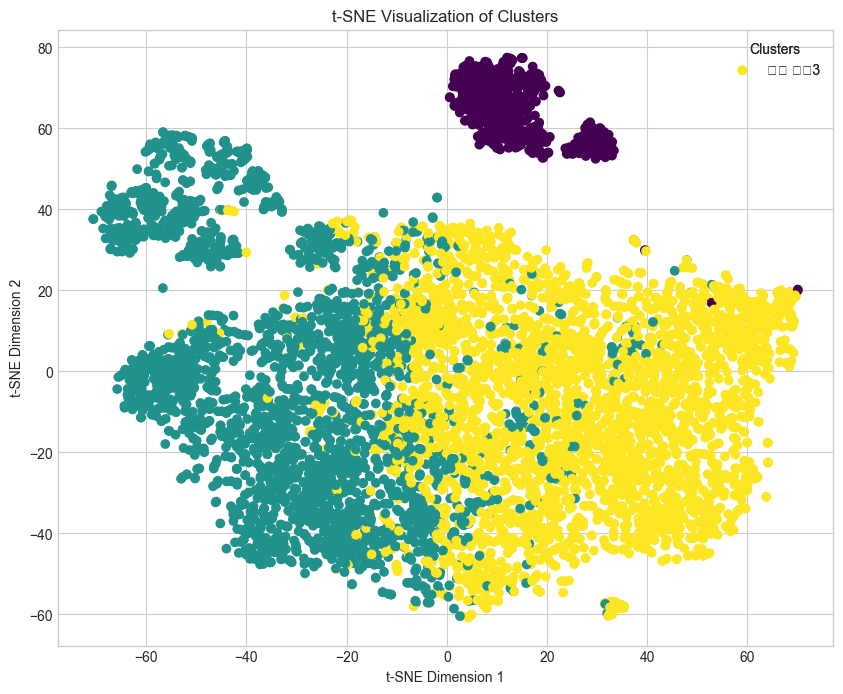

In [58]:
# 데이터셋 개요 확인
dataset_overview(df)

# 군집화 수행 및 결과 확인
scatter_data, clustered_df = clustering_simulation(df)

# (선택 사항) 군집 결과 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(scatter_data['x'], scatter_data['y'], c=scatter_data['cluster'].astype('category').cat.codes, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
legend = plt.legend(*scatter.legend_elements(), title="Clusters", labels=scatter_data['cluster'].unique())
plt.gca().add_artist(legend)
plt.show()

In [59]:
#군집된 데이터프레임의 처음 5행 출력
print("\n=== Clustered Data Head ===")
print(clustered_df.head())


=== Clustered Data Head ===
           ID    year  region  town_t  sex   age  incm  ho_incm  edu  occp  \
0  YA84208301  2023.0     1.0     1.0  1.0  75.0   3.0      2.0  1.0   7.0   
1  YA84208302  2023.0     1.0     1.0  2.0  70.0   3.0      2.0  1.0   7.0   
2  YA84212402  2023.0     1.0     1.0  2.0  42.0   2.0      3.0  3.0   3.0   
3  YA84212404  2023.0     1.0     1.0  2.0   9.0   2.0      3.0  1.0   NaN   
4  YA84242702  2023.0     1.0     1.0  1.0  43.0   4.0      4.0  4.0   1.0   

   ...  HE_Upro  HE_Ucrea  HE_Ualb  L_BR_FQ  L_LN_FQ  L_DN_FQ  L_OUT_FQ  \
0  ...      0.0      96.8      4.5      1.0      1.0      1.0       3.0   
1  ...      1.0     141.1     88.2      2.0      2.0      2.0       5.0   
2  ...      0.0     114.3      4.3      4.0      2.0      1.0       5.0   
3  ...      NaN       NaN      NaN      1.0      1.0      1.0       3.0   
4  ...      0.0     210.1      6.6      2.0      2.0      1.0       4.0   

   LS_VEG1  LS_FRUIT  cluster  
0      1.0       3.

In [ ]:
#업그레이드

CSV 파일이 성공적으로 로드되었습니다.
=== Dataset Overview ===
Shape: (6929, 98)

Data Types:
ID           object
year        float64
region      float64
town_t      float64
sex         float64
             ...   
L_LN_FQ     float64
L_DN_FQ     float64
L_OUT_FQ    float64
LS_VEG1     float64
LS_FRUIT    float64
Length: 98, dtype: object

Missing Values (including 888, 999, 88):
incm          26
ho_incm       26
edu          153
occp        1333
D_1_1          1
            ... 
L_LN_FQ      132
L_DN_FQ      132
L_OUT_FQ     132
LS_VEG1      132
LS_FRUIT     132
Length: 90, dtype: int64

Summary Statistics for Key Numerical Variables:
               age       HE_BMI      HE_sbp1      HE_dbp1       HE_glu  \
count  6929.000000  6813.000000  6594.000000  6594.000000  6184.000000   
mean     47.413624    23.258359   120.435244    73.892175   100.361255   
std      22.000776     4.169379    16.832707    10.450060    23.161769   
min       1.000000    11.894753    79.000000    31.000000    60.000000   
25

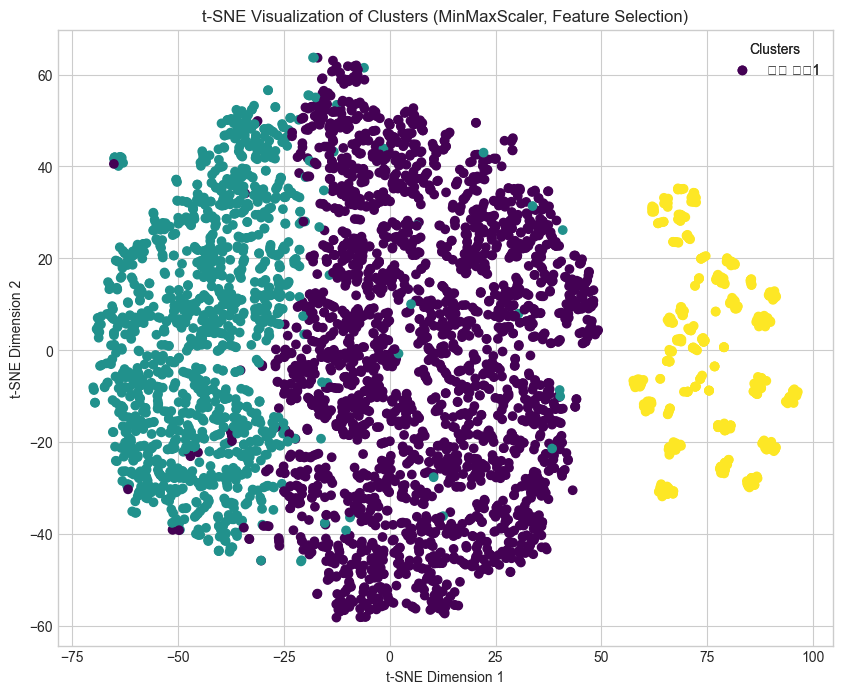


=== Clustered Data Head (이상치 제거, MinMaxScaler, 피처 선택 적용) ===
           ID    year  region  town_t  sex   age  incm  ho_incm  edu  occp  \
1  YA84208302  2023.0     1.0     1.0  2.0  70.0   3.0      2.0  1.0   7.0   
2  YA84212402  2023.0     1.0     1.0  2.0  42.0   2.0      3.0  3.0   3.0   
3  YA84212404  2023.0     1.0     1.0  2.0   9.0   2.0      3.0  1.0   NaN   
4  YA84242702  2023.0     1.0     1.0  1.0  43.0   4.0      4.0  4.0   1.0   
5  YA84242703  2023.0     1.0     1.0  2.0  12.0   4.0      4.0  1.0   NaN   

   ...  HE_Upro  HE_Ucrea  HE_Ualb  L_BR_FQ  L_LN_FQ  L_DN_FQ  L_OUT_FQ  \
1  ...      1.0     141.1     88.2      2.0      2.0      2.0       5.0   
2  ...      0.0     114.3      4.3      4.0      2.0      1.0       5.0   
3  ...      NaN       NaN      NaN      1.0      1.0      1.0       3.0   
4  ...      0.0     210.1      6.6      2.0      2.0      1.0       4.0   
5  ...      0.0     102.2     21.3      1.0      1.0      1.0       2.0   

   LS_VEG1  LS_FRU

In [62]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# 데이터 로드 (이전 코드와 동일)
try:
    df = pd.read_csv("선택컬럼_건강데이터.csv")
    print("CSV 파일이 성공적으로 로드되었습니다.")
except FileNotFoundError:
    print("오류: '선택컬럼_건강데이터.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# Dataset Overview (이전 코드와 동일)
def dataset_overview(df):
    print("=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values (including 888, 999, 88):")
    missing = df.isna().sum()
    for val in [888, 999, 88]:
        missing += (df == val).sum()
    print(missing[missing > 0])
    print("\nSummary Statistics for Key Numerical Variables:")
    key_numerical = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1']
    if all(col in df.columns for col in key_numerical):
        print(df[key_numerical].describe())
    else:
        print("경고: 일부 주요 수치형 변수가 데이터프레임에 없습니다.")
    print("\nValue Counts for Key Categorical Variables:")
    key_categorical = ['sex', 'incm', 'edu', 'occp', 'HE_HP', 'BP1', 'BP5', 'BS3_1', 'BD1_11', 'BE5_1', 'BO1']
    for col in key_categorical:
        if col in df.columns:
            print(f"\n{col}:")
            print(df[col].value_counts(dropna=False))
        else:
            print(f"\n경고: 범주형 변수 '{col}'이 데이터프레임에 없습니다.")

# Clustering Simulation (이상치 처리, MinMaxScaler, 분산 기반 피처 선택)
def clustering_simulation(df):
    # Verify required columns (이전 코드와 동일)
    required_columns = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1',
                        'sex', 'incm', 'edu', 'HE_HP', 'BP1', 'BP5', 'BS3_1', 'BD1_11', 'BE5_1', 'BO1']
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"입력 데이터에 필요한 컬럼이 없습니다: {missing_cols}")

    # Select all potential features
    all_features = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1',
                      'sex', 'incm', 'edu', 'HE_HP', 'BP1', 'BP5', 'BS3_1', 'BD1_11', 'BE5_1', 'BO1']
    numerical_features = ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'BE3_31', 'BE3_32', 'LS_FRUIT', 'LS_VEG1']
    categorical_features = [col for col in all_features if col not in numerical_features]

    # Preprocessing
    # Replace special codes with NaN (이전 코드와 동일)
    df = df.replace([888, 999, 88], np.nan)

    # Impute missing values (이전 코드와 동일)
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
    df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

    # Outlier 처리 (IQR 기반)
    for col in numerical_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"\n이상치 처리 후 데이터프레임 크기: {df.shape}")

    # 분산 계산 (수치형 변수에 대해서만)
    feature_variance = df[numerical_features].var().sort_values(ascending=False)
    top_n = 10
    selected_numerical_features = feature_variance.head(top_n).index.tolist()
    print(f"\n분산 상위 {top_n}개 수치형 피처: {selected_numerical_features}")

    # 선택된 수치형 피처만으로 스케일링
    scaler = MinMaxScaler()
    X_num_scaled = scaler.fit_transform(df[selected_numerical_features])

    # 범주형 피처는 원-핫 인코딩
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
    X_cat_encoded = encoder.fit_transform(df[categorical_features])

    # Combine features
    X = np.hstack([X_num_scaled, X_cat_encoded])

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    # Silhouette score
    silhouette = silhouette_score(X, clusters)
    print(f"\nSilhouette Score (이상치 제거, MinMaxScaler, 분산 기반 피처 선택 후): {silhouette:.3f}")

    # t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Assign cluster labels
    cluster_names = {
        0: '군집 이름1',
        1: '군집 이름2',
        2: '군집 이름3'
    }
    df['cluster'] = [cluster_names[c] for c in clusters]

    # Cluster summaries
    print("\n=== Cluster Summaries ===")
    summary_vars = selected_numerical_features + categorical_features
    summary = df.groupby('cluster')[summary_vars].mean()
    print(summary)

    scatter_data = pd.DataFrame({
        'x': X_tsne[:, 0],
        'y': X_tsne[:, 1],
        'cluster': df['cluster'],
        'age': df['age'],
        'bmi': df['HE_BMI']
    })
    return scatter_data, df

# 데이터셋 개요 확인 (이전 코드와 동일)
dataset_overview(df)

# 군집화 수행 및 결과 확인 (이전 코드와 동일)
scatter_data, clustered_df = clustering_simulation(df.copy())

# (선택 사항) 군집 결과 시각화 (이전 코드와 동일)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(scatter_data['x'], scatter_data['y'], c=scatter_data['cluster'].astype('category').cat.codes, cmap='viridis')
plt.title('t-SNE Visualization of Clusters (MinMaxScaler, Feature Selection)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
legend = plt.legend(*scatter.legend_elements(), title="Clusters", labels=scatter_data['cluster'].unique())
plt.gca().add_artist(legend)
plt.show()

# (선택 사항) 군집된 데이터프레임의 처음 몇 행 출력 (이전 코드와 동일)
print("\n=== Clustered Data Head (이상치 제거, MinMaxScaler, 피처 선택 적용) ===")
print(clustered_df.head())

1 군집 이름_건강 관리 노력 필요 그룹 (정상 체중/혈압/혈당, 낮은 채소/아침 식사)

콜레스테롤 (HE_chol): 평균 183.5 mg/dL로 정상 범위에 속합니다.
나이 (age): 평균 47.2세로 중년에 해당합니다.
수축기 혈압 (HE_sbp1): 평균 117.1 mmHg로 정상 범위에 속합니다.
이완기 혈압 (HE_dbp1): 평균 72.1 mmHg로 정상 범위에 속합니다.
혈당 (HE_glu): 평균 93.3 mg/dL로 정상 범위에 속합니다.
BMI (HE_BMI): 평균 23.0으로 정상 체중 범위에 속합니다.
저녁 식사 빈도 (BE3_31): 평균 5.4회/주로 비교적 규칙적인 저녁 식사를 합니다.
과일 섭취 빈도 (LS_FRUIT): 평균 4.2회/주로 과일 섭취가 보통입니다.
채소 섭취 빈도 (LS_VEG1): 평균 1.7회/주로 채소 섭취가 낮은 편입니다.
아침 식사 빈도 (BE3_32): 평균 0.6회/주로 아침 식사를 거의 하지 않습니다.
성별 (sex): 평균 1.78로 여성 비율이 약간 높습니다 (2에 가까울수록 여성).
만성질환 진단 (HE_HP): 평균 1.93으로 만성질환 진단 경험이 비교적 낮습니다 (2에 가까울수록 경험 없음).


2 군집 이름 비교적 건강한 중장년층 (정상 체중/혈압/혈당, 낮은 채소/아침 식사)

콜레스테롤 (HE_chol): 평균 183.1 mg/dL로 정상 범위에 속합니다.
나이 (age): 평균 52.1세로 중장년층에 해당합니다.
수축기 혈압 (HE_sbp1): 평균 120.7 mmHg로 정상 범위 상단 또는 약간 높은 경계에 있습니다.
이완기 혈압 (HE_dbp1): 평균 75.1 mmHg로 정상 범위에 속합니다.
혈당 (HE_glu): 평균 95.7 mg/dL로 정상 범위에 속합니다.
BMI (HE_BMI): 평균 24.1로 정상 체중 범위에 속합니다.
저녁 식사 빈도 (BE3_31): 평균 4.9회/주로 저녁 식사를 규칙적으로 하는 편입니다.
과일 섭취 빈도 (LS_FRUIT): 평균 4.9회/주로 과일 섭취가 보통입니다.
채소 섭취 빈도 (LS_VEG1): 평균 1.7회/주로 채소 섭취가 낮은 편입니다.
아침 식사 빈도 (BE3_32): 평균 0.6회/주로 아침 식사를 거의 하지 않습니다.
성별 (sex): 평균 1.18로 남성 비율이 높습니다 (1에 가까울수록 남성).
만성질환 진단 (HE_HP): 평균 2.32로 만성질환 진단 경험이 낮습니다 (2에 가까울수록 경험 없음).


3 군집 이름_저체중 어린 연령층 (정상 혈압/혈당/콜레스테롤, 낮은 채소 섭취, 만성질환 경험 있음)

콜레스테롤 (HE_chol): 평균 177.5 mg/dL로 정상 범위에 속합니다.
나이 (age): 평균 6.6세로 어린 연령층에 해당합니다.
수축기 혈압 (HE_sbp1): 평균 112.5 mmHg로 정상 범위에 속합니다.
이완기 혈압 (HE_dbp1): 평균 67.4 mmHg로 정상 범위에 속합니다.
혈당 (HE_glu): 평균 94.6 mg/dL로 정상 범위에 속합니다.
BMI (HE_BMI): 평균 17.5로 저체중 경향을 보입니다.
저녁 식사 빈도 (BE3_31): 평균 6.0회/주로 저녁 식사를 매우 규칙적으로 합니다.
과일 섭취 빈도 (LS_FRUIT): 평균 3.8회/주로 과일 섭취가 보통입니다.
채소 섭취 빈도 (LS_VEG1): 평균 1.7회/주로 채소 섭취가 낮은 편입니다.
아침 식사 빈도 (BE3_32): 평균 1.0회/주로 아침 식사를 가끔 합니다.
성별 (sex): 평균 1.50으로 남녀 비율이 비슷합니다.
만성질환 진단 (HE_HP): 평균 1.0으로 만성질환 진단 경험이 높습니다 (1은 해당됨).
군집 이름: 저체중 어린 연령층 (정상 혈압/혈당/콜레스테롤, 낮은 채소 섭취, 만성질환 경험 있음)